In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime as dt

In [4]:
df  = pd.read_csv("Data/london_weather_MODIFIED - london_weather_MODIFIED.csv" , low_memory=False)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [5]:
## You can obtain the current date and time with .now()
now = dt.datetime.now()
now

datetime.datetime(2024, 2, 2, 15, 59, 26, 677298)

In [6]:
#Add a datetime column based on the string in the "date" column
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00


In [7]:
## preview first row from the date column (string)
df.loc[0,'date']

19790101

In [8]:
## preview first row from the datetime column (datetime64[ns])
df.loc[0,'date']

19790101

In [9]:
## Set the date format
fmt = '%Y%m%d'

In [10]:
## convert datetime to datetime
df['date'] = pd.to_datetime(df['date'], format=fmt)

In [11]:
df_ts = df.set_index('date')
df_ts

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [12]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [13]:
weather = df_ts.loc['2000':, ['mean_temp','min_temp','max_temp','snow_depth','precipitation']]
weather

,mean_temp,min_temp,max_temp,snow_depth,precipitation
date,,,,,
2000-01-01,7.00,4.90,10.80,0.00,0.00
2000-01-02,7.90,5.00,11.50,0.00,0.20
2000-01-03,9.40,7.20,9.50,0.00,6.00
2000-01-04,7.00,4.40,11.00,0.00,0.20
2000-01-05,6.40,1.90,10.80,0.00,0.80
...,...,...,...,...,...
2020-12-27,7.50,7.60,7.50,NaN,2.00
2020-12-28,1.10,-1.30,3.60,NaN,0.20
2020-12-29,2.60,1.10,4.10,NaN,0.00


In [14]:
weather['min_temp'] = weather['min_temp'].interpolate()

In [15]:
weather['mean_temp'] = weather['mean_temp'].interpolate()

In [16]:
weather['max_temp'] = weather['max_temp'].interpolate()

In [17]:
weather['snow_depth'] = weather['snow_depth'].fillna(0)

In [18]:
weather['precipitation'] = weather['precipitation'].fillna(0)

In [19]:
print(weather['precipitation'].idxmax())
print(weather['precipitation'].max())

2015-08-26 00:00:00
51.6


In [20]:
max_precip= weather['precipitation'].resample('m').sum()

In [21]:
max_precip= max_precip.loc['2000':'2010']

<Axes: xlabel='date'>

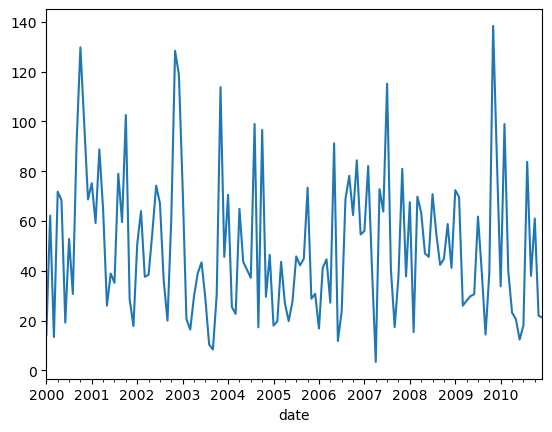

In [22]:
max_precip.plot()

In [23]:
cool_temp= weather['mean_temp'].resample('A').mean()

In [24]:
cool_temp= cool_temp.loc['2000':'2020']

<Axes: xlabel='date'>

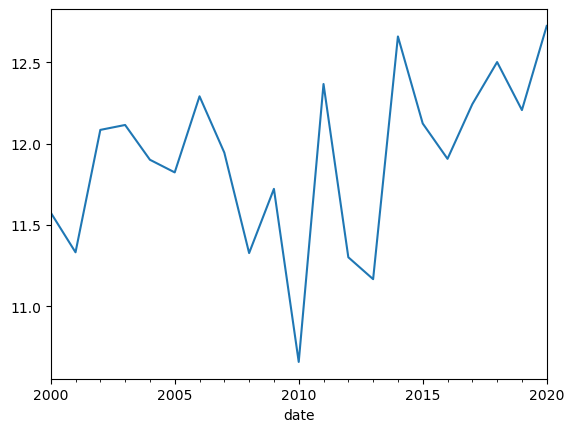

In [25]:
cool_temp.plot()

In [26]:
print(weather['mean_temp'].idxmin())
print(weather['mean_temp'].min())

2010-12-20 00:00:00
-4.1
